In [1]:
import pandas as pd

In [2]:
alucar = pd.read_csv('alucar.csv')
alucar.head(5)

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [3]:
#quantidade de linhas e colunas
alucar.shape

(24, 2)

In [4]:
#soma de dados nulos por coluna
alucar.isna().sum()
#quantidade de dados nulo total
alucar.isna().sum().sum()

0

In [5]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [6]:
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [7]:
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

In [8]:
print(sns.__version__)

0.10.1


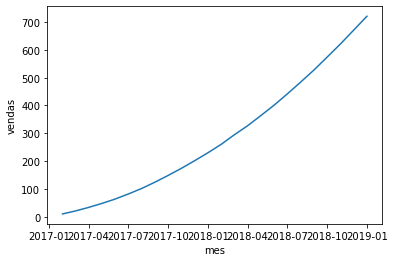

In [9]:
sns.lineplot(x='mes', y='vendas', data=alucar)

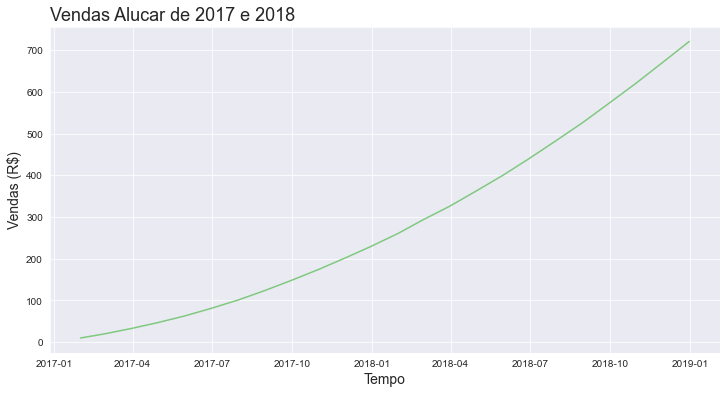

In [10]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas (R$)', fontsize=14)
ax = ax

In [11]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head(5)

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


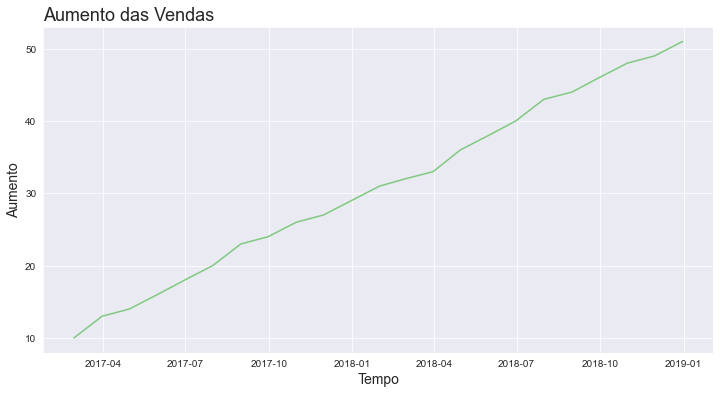

In [12]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='aumento', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Aumento das Vendas', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Aumento', fontsize=14)
ax = ax

In [13]:
def plotar(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)
    ax = ax

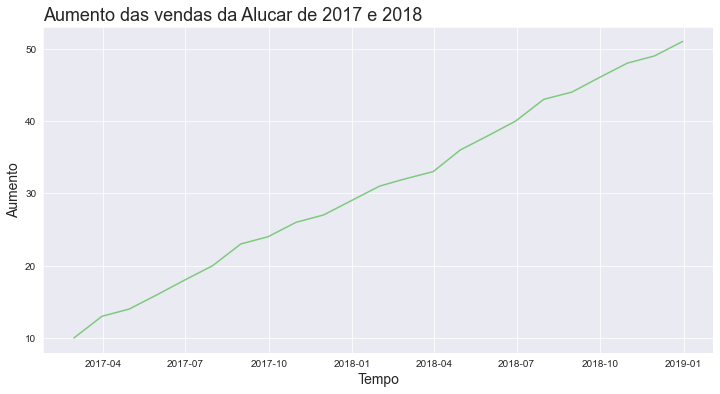

In [14]:
plotar('Aumento das vendas da Alucar de 2017 e 2018', 'Tempo', 'Aumento', 'mes', 'aumento', alucar)

In [15]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head(5)

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


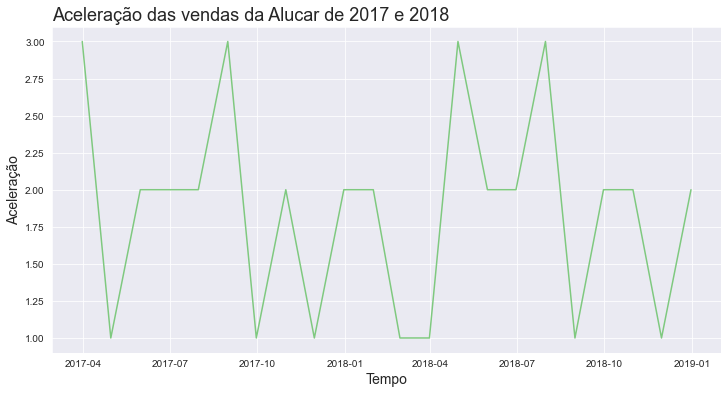

In [16]:
plotar('Aceleração das vendas da Alucar de 2017 e 2018', 'Tempo', 'Aceleração', 'mes', 'aceleracao', alucar)

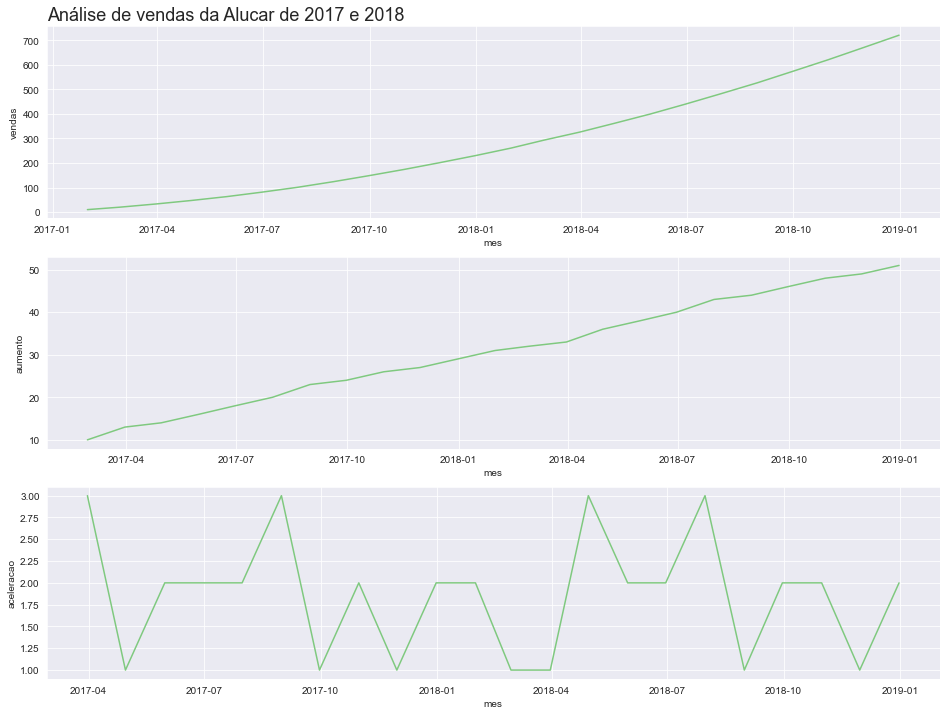

In [17]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
ax.set_title('Análise de vendas da Alucar de 2017 e 2018', fontsize = 18, loc='left')
sns.lineplot(x='mes', y='vendas', data=alucar)
plt.subplot(3,1,2)
sns.lineplot(x='mes', y='aumento', data=alucar)
plt.subplot(3,1,3)
sns.lineplot(x='mes', y='aceleracao', data=alucar)
ax = ax

In [18]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo, fontsize = 18, loc='left')
    sns.lineplot(x=x, y=y1, data=dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data=dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data=dataset)
    ax = ax

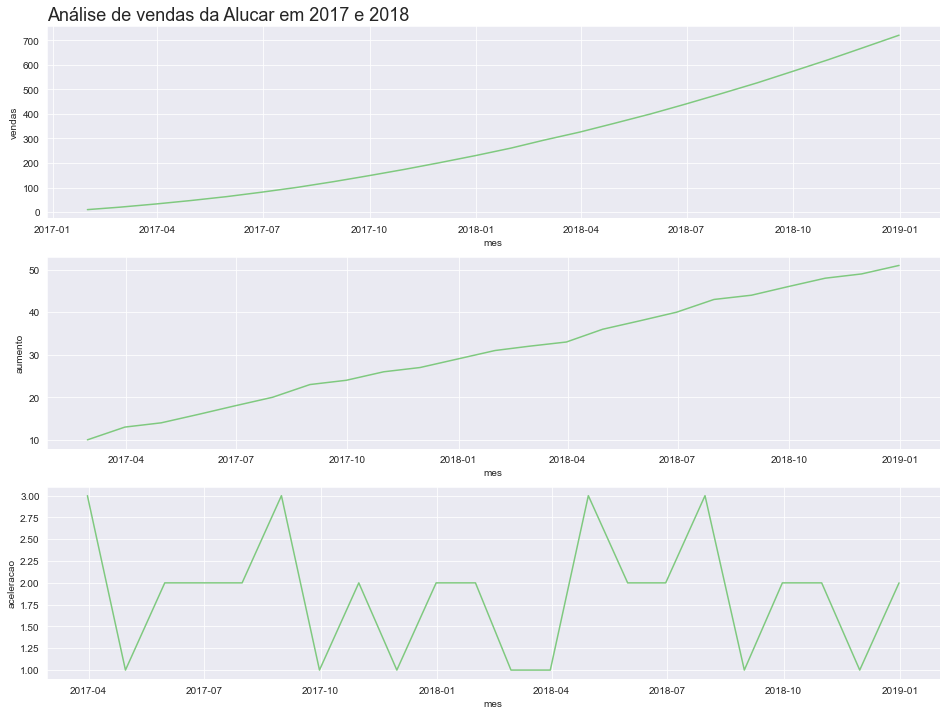

In [19]:
plot_comparacao('mes','vendas', 'aumento', 'aceleracao', alucar, 'Análise de vendas da Alucar em 2017 e 2018')

In [20]:
from pandas.plotting import autocorrelation_plot

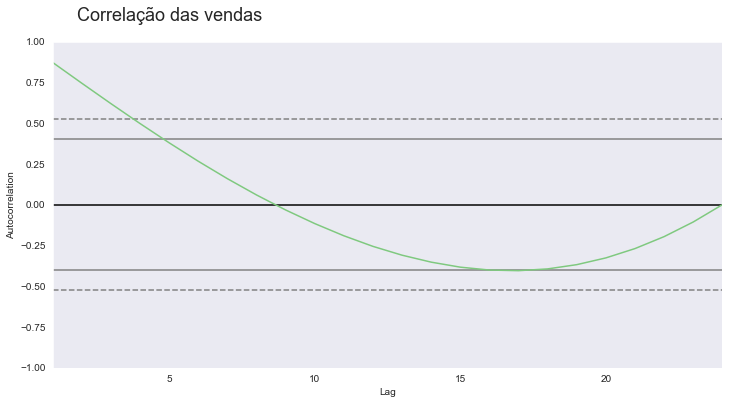

In [21]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas', fontsize=18, x=0.26, y=0.96)
autocorrelation_plot(alucar['vendas'])
ax = ax

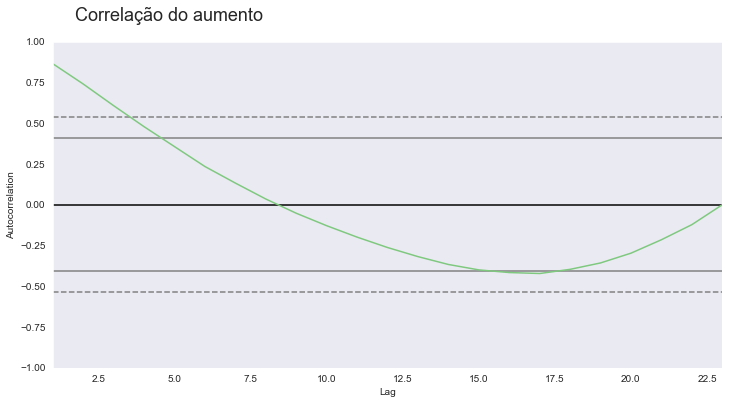

In [22]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento', fontsize=18, x=0.26, y=0.96)
autocorrelation_plot(alucar['aumento'][1:])
ax = ax

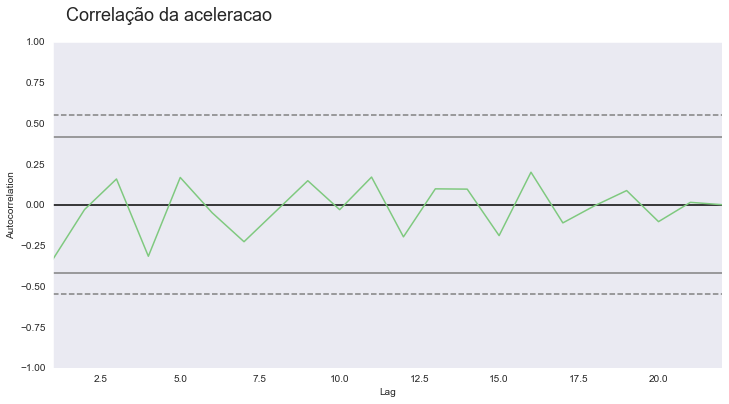

In [23]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleracao', fontsize=18, x=0.26, y=0.96)
autocorrelation_plot(alucar['aceleracao'][2:])
ax = ax

# Alucar - Analisando assinantes da newsletter

In [24]:
assinantes = pd.read_csv('newsletter_alucar.csv')
assinantes.head(5)

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [25]:
print('Quantidade de linhas e colunas: ', assinantes.shape)
print('Quantidade de dados nulos: ', assinantes.isna().sum().sum())

Quantidade de linhas e colunas:  (24, 2)
Quantidade de dados nulos:  0


In [26]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [27]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


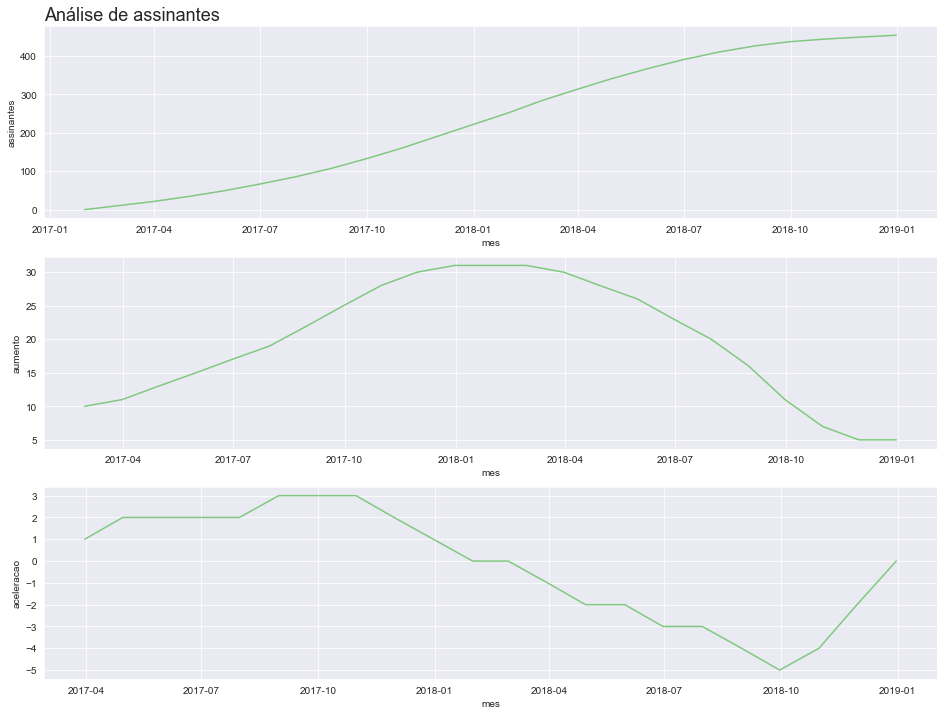

In [28]:
plot_comparacao('mes','assinantes','aumento','aceleracao', assinantes, 'Análise de assinantes')

In [29]:
chocolura = pd.read_csv('chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [30]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])

In [31]:
print('Qnt linhas', chocolura.shape)
print('Qnt dados nulos', chocolura.isna().sum().sum())

Qnt linhas (24, 2)
Qnt dados nulos 0


In [32]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


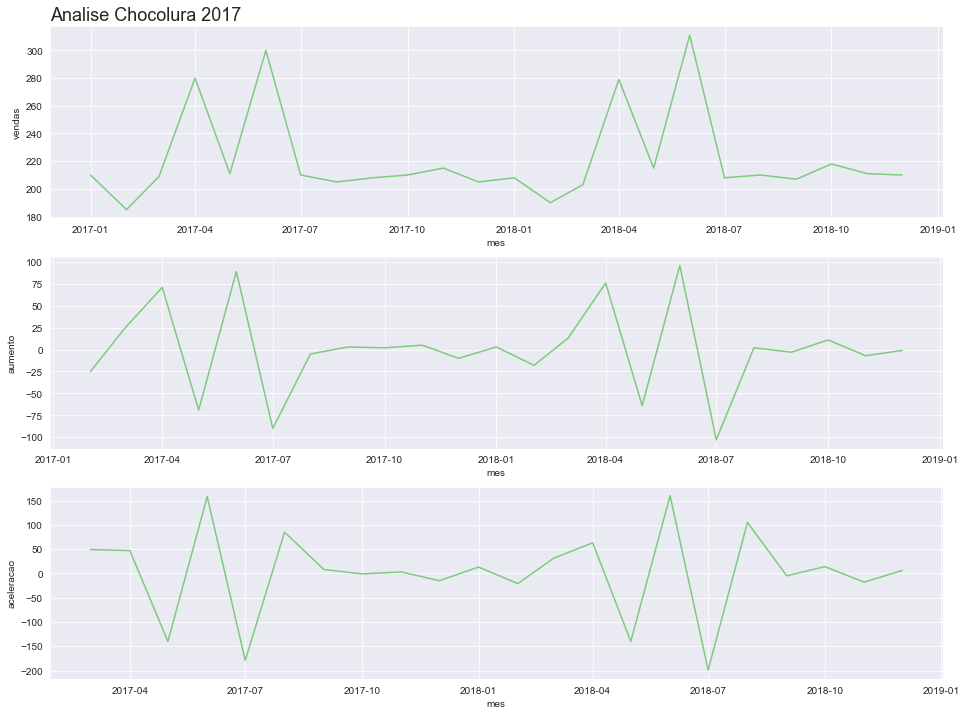

In [33]:
plot_comparacao('mes','vendas','aumento', 'aceleracao', chocolura, 'Analise Chocolura 2017')

# Chocolura - Vendas diárias (Outubro e Novembro)

In [34]:
vendas_por_dia = pd.read_csv('vendas_por_dia.csv')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [35]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [36]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


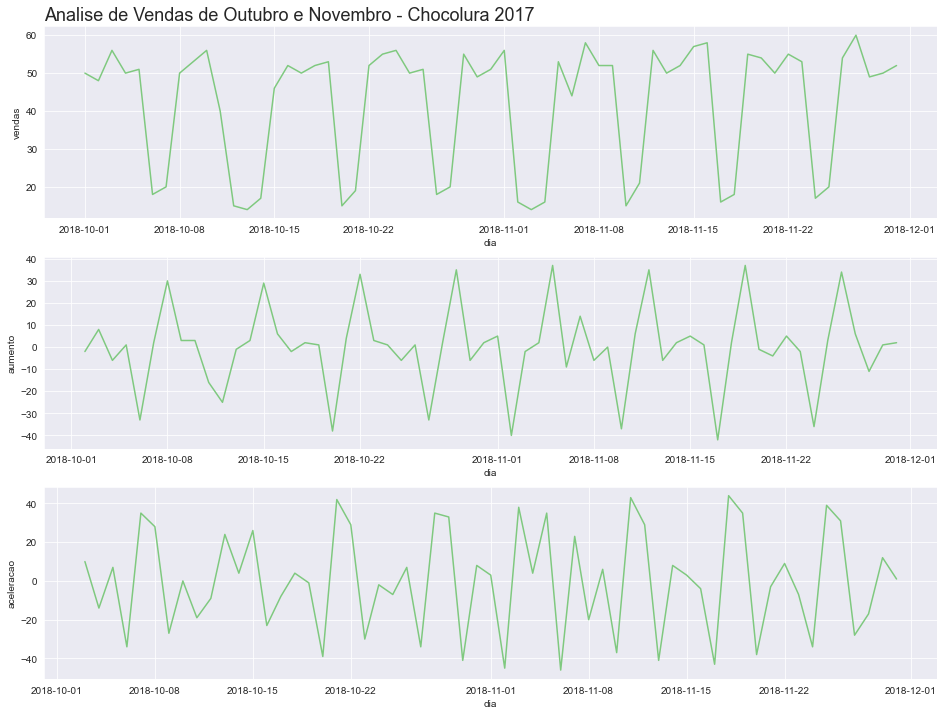

In [37]:
plot_comparacao('dia','vendas','aumento', 'aceleracao', vendas_por_dia, 'Analise de Vendas de Outubro e Novembro - Chocolura 2017')

In [38]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.day_name()

In [39]:
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday


In [40]:
vendas_por_dia['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [41]:
dias_traduzidos = {'Monday':'Segunda', 
                   'Tuesday':'Terca', 
                   'Wednesday':'Quarta', 
                   'Thursday':'Quinta', 
                   'Friday':'Sexta', 
                   'Saturday':'Sabado',
                   'Sunday':'Domingo'}

In [42]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_traduzidos)

In [43]:
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terca
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta


In [44]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas','aumento','aceleracao'].mean().round()

<ipython-input-44-50062ad17e95>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas','aumento','aceleracao'].mean().round()


In [45]:
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Sabado,16.0,-28.0,-20.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Terca,52.0,-1.0,-34.0


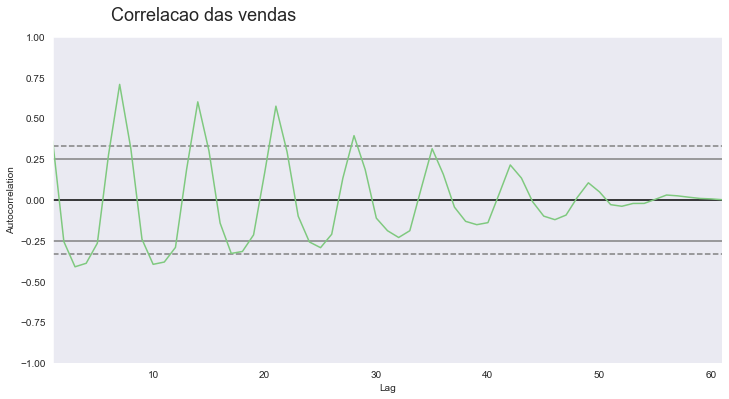

In [46]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlacao das vendas', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax = ax

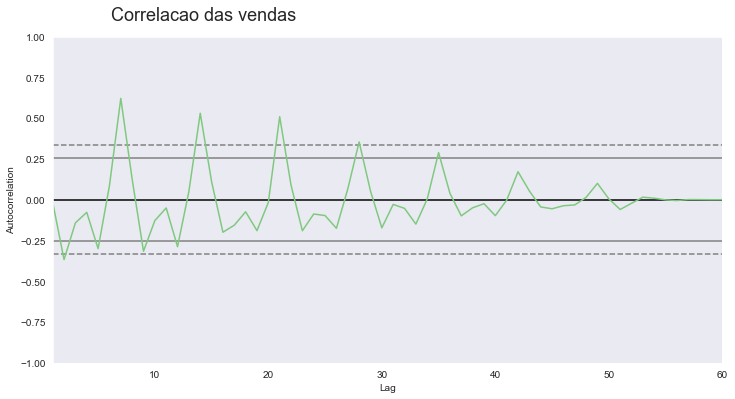

In [47]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlacao das vendas', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax = ax

In [48]:
cafelura = pd.read_csv('cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [49]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'])
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

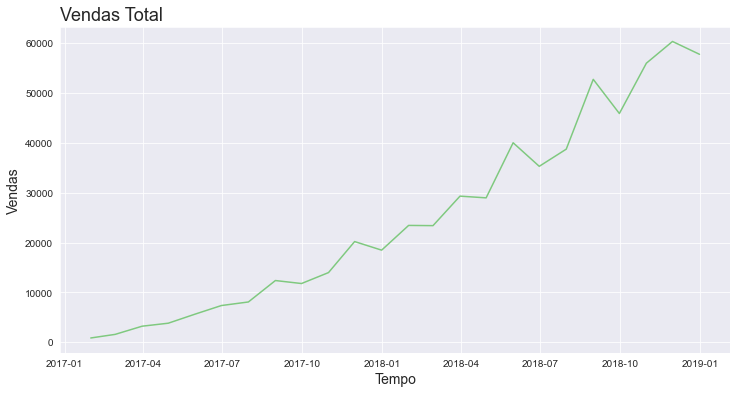

In [50]:
plotar('Vendas Total','Tempo','Vendas','mes','vendas', cafelura)

In [51]:
quantidade_de_dias_de_fds = pd.read_csv('dias_final_de_semana.csv')
quantidade_de_dias_de_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [52]:
quantidade_de_dias_de_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8], dtype=int64)

In [53]:
cafelura['vendas_normalizadas'] = cafelura['vendas'] / quantidade_de_dias_de_fds['quantidade_de_dias'].values
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


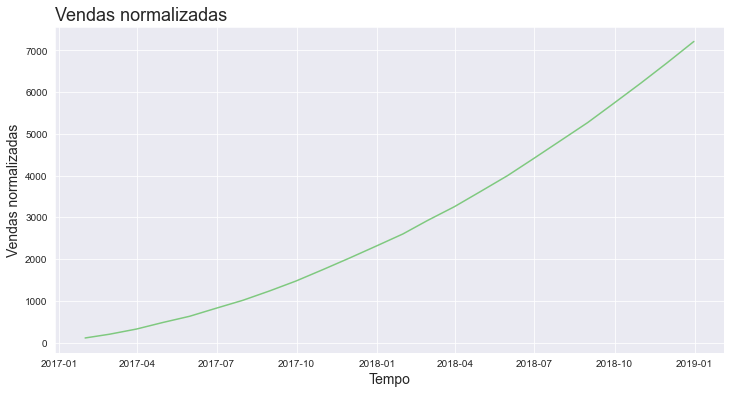

In [54]:
plotar('Vendas normalizadas', 'Tempo','Vendas normalizadas','mes','vendas_normalizadas', cafelura)

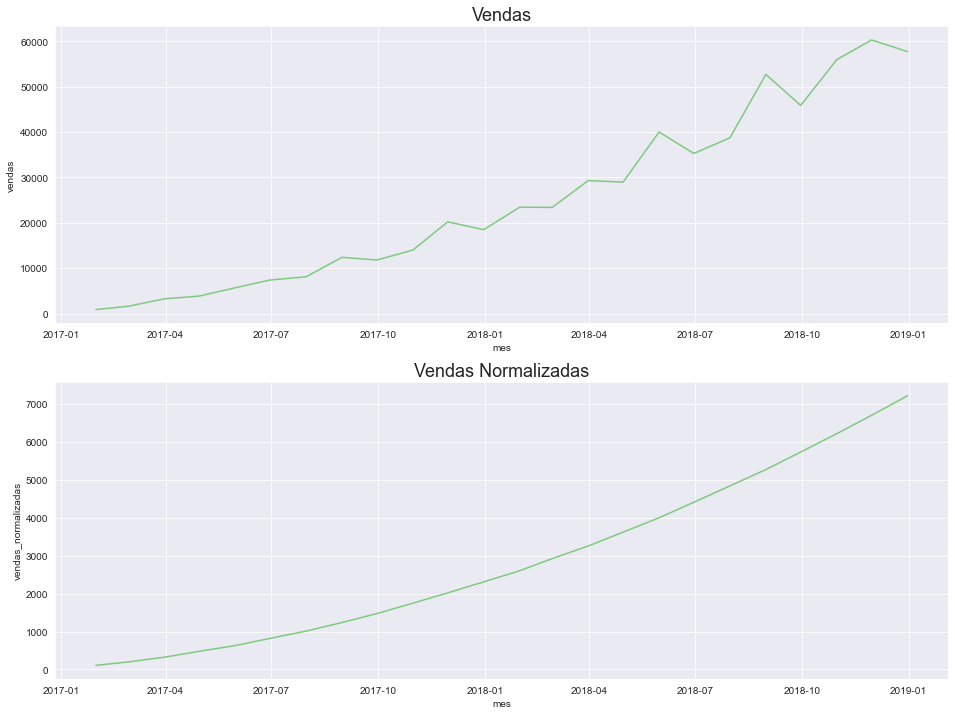

In [55]:
plt.figure(figsize=(16,12))
ax = plt.subplot(2,1,1)
ax.set_title('Vendas', fontsize=18)
sns.lineplot(x='mes',y='vendas', data=cafelura)
ax = plt.subplot(2,1,2)
ax.set_title('Vendas Normalizadas', fontsize=18)
sns.lineplot(x='mes',y='vendas_normalizadas', data=cafelura)
ax=ax

# Statsmodels

In [60]:
from statsmodels.tsa.seasonal import seasonal_decompose
chocolura['vendas']

0     210
1     185
2     209
3     280
4     211
5     300
6     210
7     205
8     208
9     210
10    215
11    205
12    208
13    190
14    203
15    279
16    215
17    311
18    208
19    210
20    207
21    218
22    211
23    210
Name: vendas, dtype: int64

In [63]:
resultado = seasonal_decompose([chocolura['vendas']], freq=3)

<ipython-input-63-cf3888967de1>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  resultado = seasonal_decompose([chocolura['vendas']], freq=3)


ValueError: x must have 2 complete cycles requires 6 observations. x only has 1 observation(s)

In [64]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

NameError: name 'resultado' is not defined

In [65]:
data = ({
    'observacao':observacao,
    'tendencia':tendencia,
    'sazonalidade':sazonalidade,
    'ruido':ruido
})

resultado = pd.DataFrame(data)
resultado.head()

NameError: name 'observacao' is not defined

In [66]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'sazonalidade', resultado,
               'Exemplo de Statsmodels')

NameError: name 'resultado' is not defined

In [67]:
alucel = pd.read_csv('alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [68]:
alucel['dia'] = pd.to_datetime(alucel['dia'])

In [69]:
alucel['aumento'] = alucel['vendas'].diff()
alucel['aceleracao'] = alucel['aumento'].diff()
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


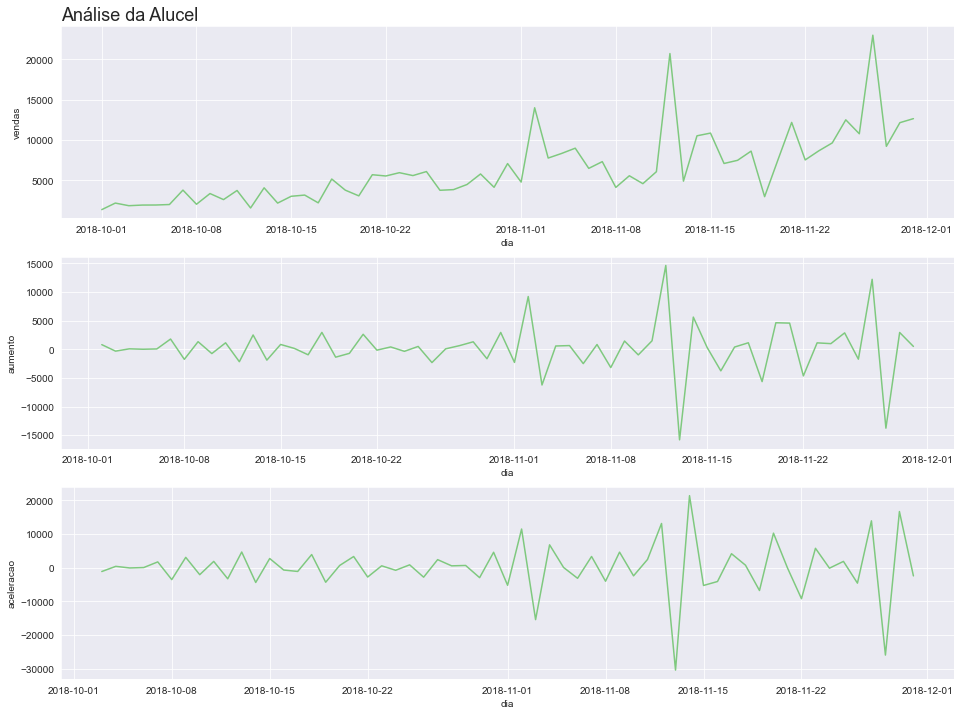

In [70]:
plot_comparacao('dia','vendas','aumento','aceleracao',alucel,'Análise da Alucel')

In [71]:
alucel['media_movel'] = alucel['vendas'].rolling(7).mean()

In [72]:
alucel

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
...,...,...,...,...,...
56,2018-11-26,10773.53,-1726.46,-4587.84,9840.835714
57,2018-11-27,22984.56,12211.03,13937.49,12037.211429
58,2018-11-28,9216.26,-13768.30,-25979.33,11613.995714
59,2018-11-29,12147.61,2931.35,16699.65,12273.428571


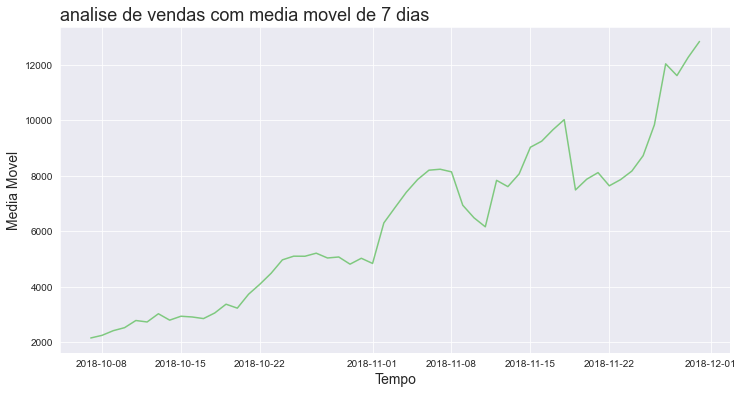

In [73]:
plotar('analise de vendas com media movel de 7 dias','Tempo','Media Movel','dia','media_movel',alucel)

In [74]:
alucel['media_movel_21'] = alucel['vendas'].rolling(21).mean()

In [77]:
plotar('analise de vendas com media movel de 21 dias','Tempo','Media Movel','dia','media_movel_21',alucel, 'Comparando vendas')

TypeError: plotar() takes 6 positional arguments but 7 were given

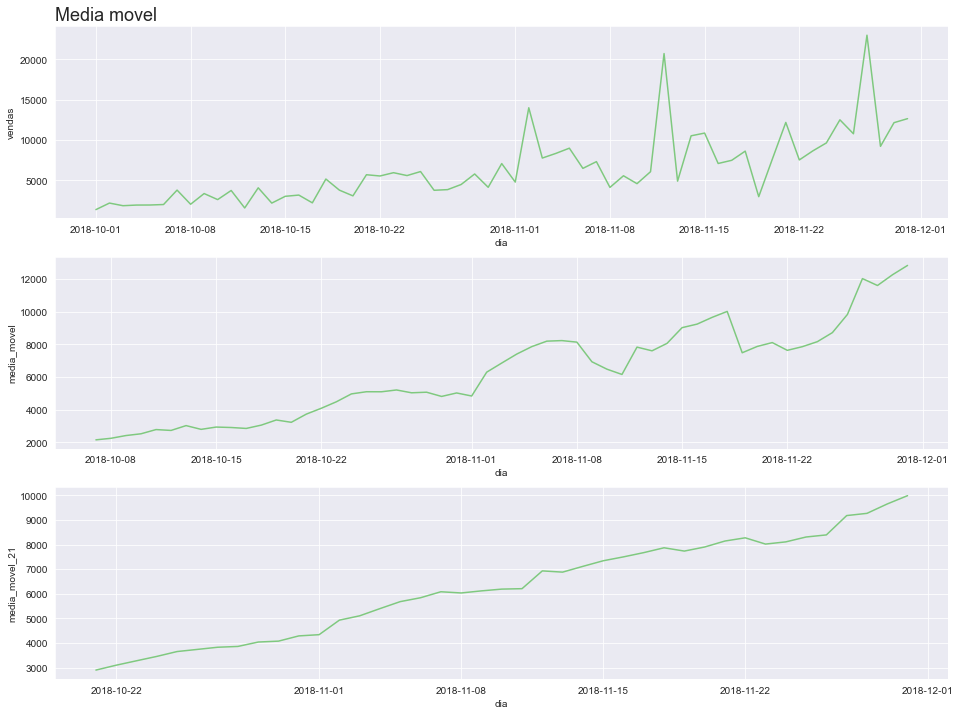

In [78]:
plot_comparacao('dia', 'vendas', 'media_movel', 'media_movel_21', alucel, 'Media movel')